# deltize.py -- convert between raw and delta representations of the ice thickness distribution

In [39]:
import numpy as np

from dirichlet_assimilate import visualize, deltize, shared_classes, examples
import importlib
def reload():
    for module in (shared_classes, deltize, visualize, examples):
        importlib.reload(module)

RawSample(area=array([0.2 , 0.65, 0.1 ]), volume=array([0.08, 1.  , 0.31]), snow=array([0.08, 1.  , 0.31]))


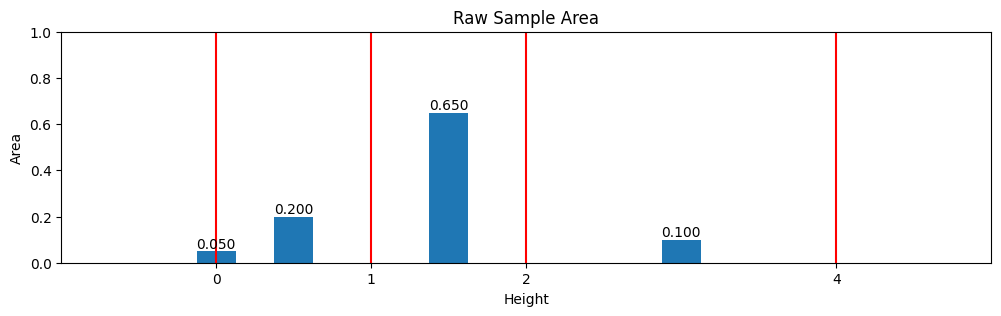

In [40]:
v = visualize.Visualisation(examples.h_bnd, log_scale=False, figsize=(12, 3))
v.show_raw_sample(examples.raw_sample)
v.ax.set_title('Raw Sample Area')
print(examples.raw_sample)

## Process and visualize a sample and ensemble

In [41]:
s = deltize.process_sample(examples.raw_sample, examples.h_bnd)
assert np.allclose(s, examples.sample)  # test that this sample is processed correctly
s

Sample([0.05 , 0.12 , 0.08 , 0.3  , 0.35 , 0.045, 0.055])

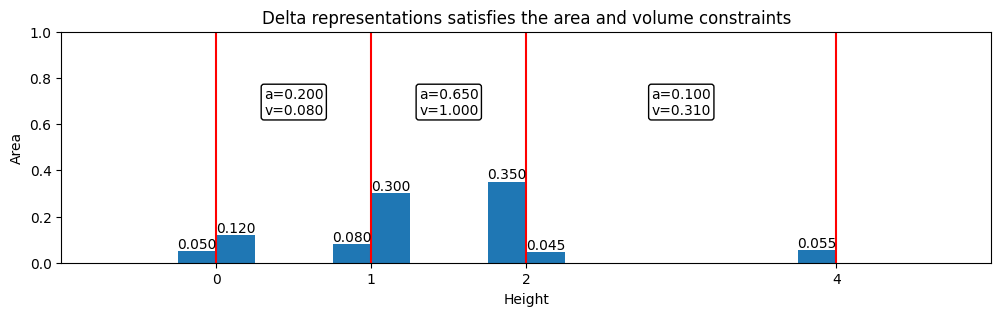

In [42]:
v = visualize.Visualisation(examples.h_bnd, log_scale=False, figsize=(12,3))
v.show_sample(s)
v.ax.set_title('Delta representations satisfies the area and volume constraints');

In [43]:
reload()
en = deltize.process_ensemble(examples.raw_ensemble, examples.h_bnd)
for s in en.samples:
    print(repr(s))

Sample([0.05 , 0.12 , 0.08 , 0.3  , 0.35 , 0.045, 0.055])
Sample([0.06 , 0.09 , 0.08 , 0.32 , 0.34 , 0.065, 0.045])
Sample([0.1  , 0.02 , 0.08 , 0.3  , 0.35 , 0.145, 0.005])
Sample([0. , 0. , 0. , 0.5, 0.5, 0. , 0. ])
Sample([1., 0., 0., 0., 0., 0., 0.])


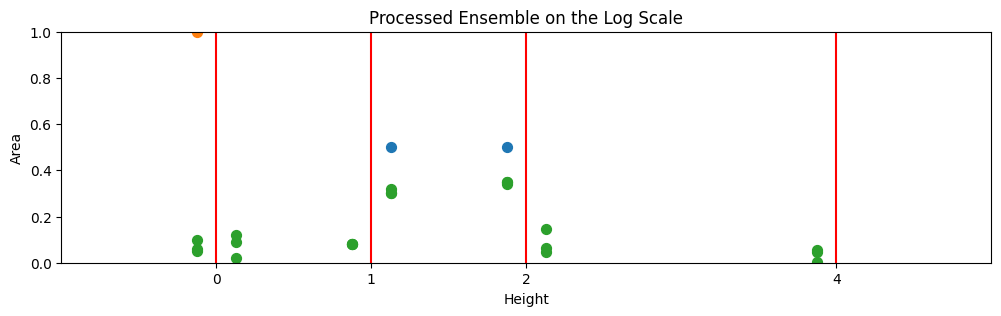

In [44]:
reload()
v = visualize.Visualisation(examples.h_bnd, log_scale=False, bottom=-6, figsize=(12,3))
v.show_ensemble(en)
v.ax.set_title('Processed Ensemble on the Log Scale');

## Post process the Ensemble back into raw form and verify that it matches the original.

In [45]:
post_en = deltize.post_process_ensemble(en, examples.h_bnd)
post_en

RawEnsemble(samples=[RawSample(area=array([0.2 , 0.65, 0.1 ]), volume=array([0.08, 1.  , 0.31]), snow=Sample([0., 0., 0.])), RawSample(area=array([0.17, 0.66, 0.11]), volume=array([0.08, 1.  , 0.31]), snow=Sample([0., 0., 0.])), RawSample(area=array([0.1 , 0.65, 0.15]), volume=array([0.08, 1.  , 0.31]), snow=Sample([0., 0., 0.])), RawSample(area=array([0., 1., 0.]), volume=array([0. , 1.5, 0. ]), snow=Sample([0., 0., 0.])), RawSample(area=array([0., 0., 0.]), volume=array([0., 0., 0.]), snow=Sample([0., 0., 0.]))])

In [46]:
for orig_s, post_s in zip(examples.raw_ensemble.samples, post_en.samples):
    assert np.allclose(orig_s.area, post_s.area)
    assert np.allclose(orig_s.volume, post_s.volume)
    # assert np.allclose(orig_s.snow, post_s.snow), (orig_s.snow, post_s.snow)
print('Success! Converting to and from the delta representation matches the original.')

Success! Converting to and from the delta representation matches the original.
